In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 1. Chargement et aperçu des données
data = pd.read_csv('breast_cancer_dataset.csv')
print("Aperçu des données:")
print(data.head())
print("\nInformations sur les données:")
print(data.info())

# 2. Séparation des données en variables explicatives X et variable cible y
X = data.iloc[:, :-1]  # Supposons que toutes les colonnes sauf la dernière sont explicatives
y = data.iloc[:, -1]   # Supposons que la dernière colonne est la cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Construction et entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")

start_train_time = time.time()
knn.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# 4. Prédictions et évaluation du modèle
y_pred = knn.predict(X_test)
start_test_time = time.time()
y_pred = knn.predict(X_test)
end_test_time = time.time()
test_time = end_test_time - start_test_time

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)





Aperçu des données:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst ar

In [11]:

print("\nÉvaluation du modèle:")
print(f"Exactitude (Accuracy): {accuracy:.2f}")
print(f"Précision (Precision): {precision:.2f}")
print(f"Rappel (Recall): {recall:.2f}")
print(f"Score F1: {f1:.2f}")
print(f"Temps d'entraînement: {train_time:.4f} secondes")
print(f"Temps de test: {test_time:.4f} secondes")


Évaluation du modèle:
Exactitude (Accuracy): 0.96
Précision (Precision): 0.93
Rappel (Recall): 1.00
Score F1: 0.97
Temps d'entraînement: 0.0011 secondes
Temps de test: 0.0078 secondes


In [9]:
# 5. Modèles avec k=1 et k=20
for k in [1, 20]:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"\nModèle KNN avec k={k}:")
    print(f"Exactitude sur l'ensemble d'entraînement: {train_accuracy:.2f}")
    print(f"Exactitude sur l'ensemble de test: {test_accuracy:.2f}")

    if k == 1:
        print("Avec k=1, le modèle est susceptible de sur-ajuster (overfitting).")
    elif k == 20:
        print("Avec k=20, le modèle peut sous-ajuster (underfitting).")


Modèle KNN avec k=1:
Exactitude sur l'ensemble d'entraînement: 1.00
Exactitude sur l'ensemble de test: 0.93
Avec k=1, le modèle est susceptible de sur-ajuster (overfitting).

Modèle KNN avec k=20:
Exactitude sur l'ensemble d'entraînement: 0.92
Exactitude sur l'ensemble de test: 0.96
Avec k=20, le modèle peut sous-ajuster (underfitting).



Matrice de corrélation des caractéristiques:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691

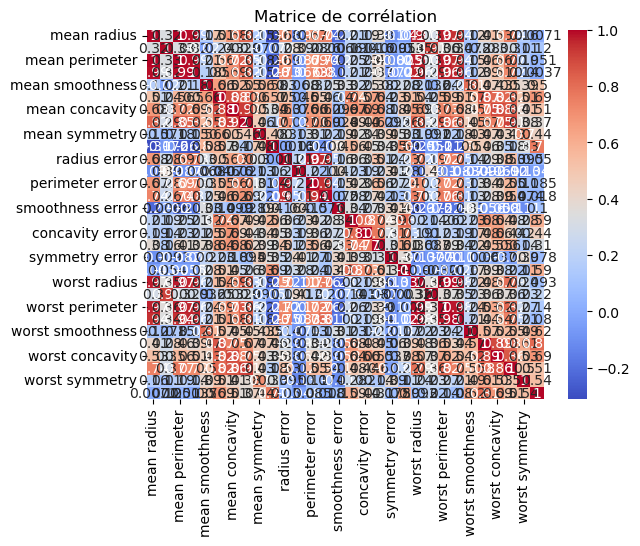


Exactitude après PCA: 0.95


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

# 6. Matrice de corrélation
print("\nMatrice de corrélation des caractéristiques:")
corr_matrix = X.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# 7. Réduction de dimensions avec PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nExactitude après PCA: {accuracy_pca:.2f}")


In [14]:
# 8. Réduction de dimensions avec Isomap
isomap = Isomap(n_components=2)
X_train_isomap = isomap.fit_transform(X_train)
X_test_isomap = isomap.transform(X_test)

knn_isomap = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_isomap.fit(X_train_isomap, y_train)
y_pred_isomap = knn_isomap.predict(X_test_isomap)

accuracy_isomap = accuracy_score(y_test, y_pred_isomap)
print(f"Exactitude après Isomap: {accuracy_isomap:.2f}")


Exactitude après Isomap: 0.93


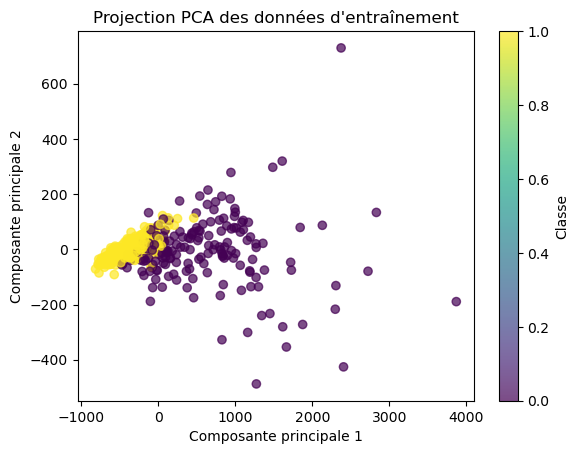

In [15]:
# Visualisation des données réduites avec PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title("Projection PCA des données d'entraînement")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label="Classe")
plt.show()


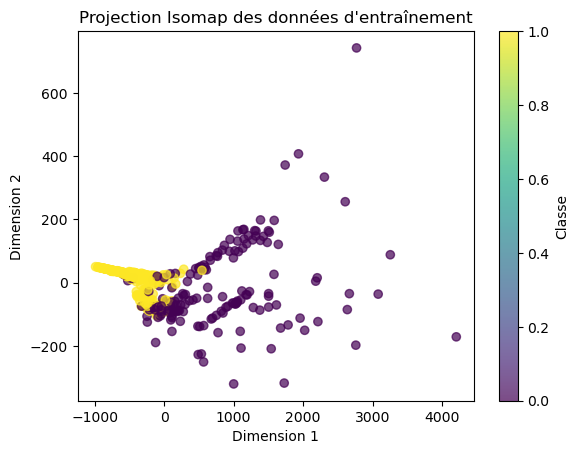

In [16]:
# Visualisation des données réduites avec Isomap
plt.scatter(X_train_isomap[:, 0], X_train_isomap[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title("Projection Isomap des données d'entraînement")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Classe")
plt.show()

In [17]:
# Réapplication des étapes 3, 4, 5 et 6 sur les données réduites
for method_name, (X_tr, X_te) in zip(["PCA", "Isomap"], [(X_train_pca, X_test_pca), (X_train_isomap, X_test_isomap)]):
    print(f"\nApplication du modèle KNN avec réduction de dimensions ({method_name}):")
    knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")

    start_train_time = time.time()
    knn.fit(X_tr, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    start_test_time = time.time()
    y_pred = knn.predict(X_te)
    end_test_time = time.time()
    test_time = end_test_time - start_test_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Exactitude (Accuracy): {accuracy:.2f}")
    print(f"Précision (Precision): {precision:.2f}")
    print(f"Rappel (Recall): {recall:.2f}")
    print(f"Score F1: {f1:.2f}")
    print(f"Temps d'entraînement: {train_time:.4f} secondes")
    print(f"Temps de test: {test_time:.4f} secondes")


Application du modèle KNN avec réduction de dimensions (PCA):
Exactitude (Accuracy): 0.95
Précision (Precision): 0.93
Rappel (Recall): 0.99
Score F1: 0.96
Temps d'entraînement: 0.0012 secondes
Temps de test: 0.0068 secondes

Application du modèle KNN avec réduction de dimensions (Isomap):
Exactitude (Accuracy): 0.93
Précision (Precision): 0.93
Rappel (Recall): 0.96
Score F1: 0.94
Temps d'entraînement: 0.0015 secondes
Temps de test: 0.0066 secondes


In [18]:
# Comparaison des performances
print("\nComparaison des performances entre les méthodes de réduction de dimensions et l'ensemble complet des données:")
print(f"Exactitude initiale (ensemble complet): {accuracy:.2f}")
print(f"Exactitude après PCA: {accuracy_pca:.2f}")
print(f"Exactitude après Isomap: {accuracy_isomap:.2f}")



Comparaison des performances entre les méthodes de réduction de dimensions et l'ensemble complet des données:
Exactitude initiale (ensemble complet): 0.93
Exactitude après PCA: 0.95
Exactitude après Isomap: 0.93


In [19]:
# Conclusion
print("\nAnalyse des résultats:")
print("La méthode la plus appropriée dépend de la balance entre la simplicité, la visualisation et la précision. PCA offre souvent une meilleure préservation de la variance des données, tandis qu'Isomap est plus adapté aux données non linéaires.")



Analyse des résultats:
La méthode la plus appropriée dépend de la balance entre la simplicité, la visualisation et la précision. PCA offre souvent une meilleure préservation de la variance des données, tandis qu'Isomap est plus adapté aux données non linéaires.
